[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/yingwang-git/R_StatisticAnalysis/HEAD?filepath=1_LinearRegression.ipynb)

**Click above button to run code online. It may take a long time to load.**

# Linear Regression
(Below Links are Unavailable in GitHub)

1. [Introduction](#introduction-to-linear-regression)
2. [Simple Linear Regression](#simple-linear-regression)
3. [Multiple Linear Regression](#multiple-linear-regression)


# Introduction to Linear Regression

# Data Preparation

## import packages

In [27]:
if (!require("pacman")) install.packages("pacman")
pacman::p_load(
    AER,  # to load the dataset
    car  # to calculte VIF and test multicollinearity
  )

## prepare dataset

In [28]:
data("HousePrices")  # use the dataset "HousePrices" as the sample data
assign("data", HousePrices)  # rename it into "data"

---  
1. The dataset "HousePrices" is a dataset about the sale prices of houses.  
2. All variables and definition are listed below.  
3. We are interested in what determines the sale prices of houses.

|**variable**  |**definition**                                                            |
|----------|-----------------------------------------------------------------------|
|price     |Sale price of a house.                                                 |
|lotsize   |Lot size of a property in square feet.                                 |
|bedrooms  |Number of bedrooms.                                                    |
|bathrooms |Number of full bathrooms.                                              |
|stories   |Number of stories excluding basement.                                  |
|driveway  |Factor. Does the house have a driveway?                                |
|recreation|Factor. Does the house have a recreational room?                       |
|fullbase  |Factor. Does the house have a full finished basement?                  |
|gasheat   |Factor. Does the house use gas for hot water heating?                  |
|aircon    |Factor. Is there central air conditioning?                             |
|garage    |Number of garage places.                                               |
|prefer    |Factor. Is the house located in the preferred neighborhood of the city?|

In [29]:
str(data)  #  show all variables

'data.frame':	546 obs. of  12 variables:
 $ price     : num  42000 38500 49500 60500 61000 66000 66000 69000 83800 88500 ...
 $ lotsize   : num  5850 4000 3060 6650 6360 4160 3880 4160 4800 5500 ...
 $ bedrooms  : num  3 2 3 3 2 3 3 3 3 3 ...
 $ bathrooms : num  1 1 1 1 1 1 2 1 1 2 ...
 $ stories   : num  2 1 1 2 1 1 2 3 1 4 ...
 $ driveway  : Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ recreation: Factor w/ 2 levels "no","yes": 1 1 1 2 1 2 1 1 2 2 ...
 $ fullbase  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 2 2 1 2 1 ...
 $ gasheat   : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ aircon    : Factor w/ 2 levels "no","yes": 1 1 1 1 1 2 1 1 1 2 ...
 $ garage    : num  1 0 0 0 0 0 2 0 0 1 ...
 $ prefer    : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...


In [30]:
summary(data)  # descriptive statistics of data

     price           lotsize         bedrooms       bathrooms    
 Min.   : 25000   Min.   : 1650   Min.   :1.000   Min.   :1.000  
 1st Qu.: 49125   1st Qu.: 3600   1st Qu.:2.000   1st Qu.:1.000  
 Median : 62000   Median : 4600   Median :3.000   Median :1.000  
 Mean   : 68122   Mean   : 5150   Mean   :2.965   Mean   :1.286  
 3rd Qu.: 82000   3rd Qu.: 6360   3rd Qu.:3.000   3rd Qu.:2.000  
 Max.   :190000   Max.   :16200   Max.   :6.000   Max.   :4.000  
    stories      driveway  recreation fullbase  gasheat   aircon   
 Min.   :1.000   no : 77   no :449    no :355   no :521   no :373  
 1st Qu.:1.000   yes:469   yes: 97    yes:191   yes: 25   yes:173  
 Median :2.000                                                     
 Mean   :1.808                                                     
 3rd Qu.:2.000                                                     
 Max.   :4.000                                                     
     garage       prefer   
 Min.   :0.0000   no :418  
 1st Q

# Simple Linear Regression

---  
The simple linear regression involves only one independent variable (X) and one dependent variable (Y).

---  
We first use simple linear regression to examine the effects of size on house prices, with "price" as Y and "lotsize" as X.

## data visualization

### dependent variable (Y)

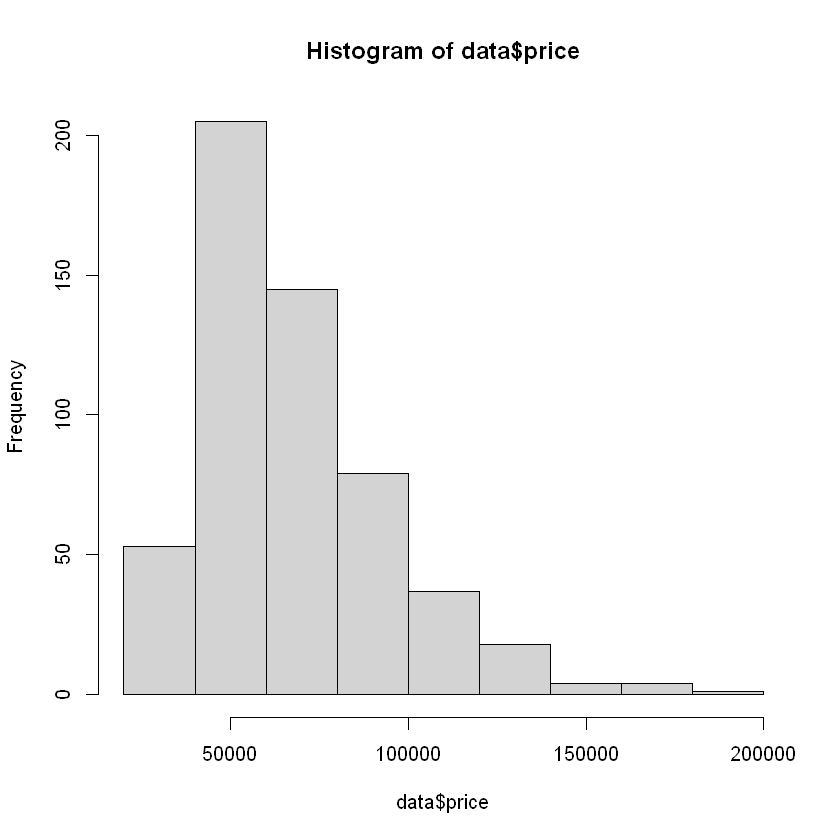

In [32]:
hist(data$price)

---  

The histogram show that our dependent variable ("price") is not normal distributed.  
Therefore, we may need some further preprocessing of this variable.

### independent variable (X)

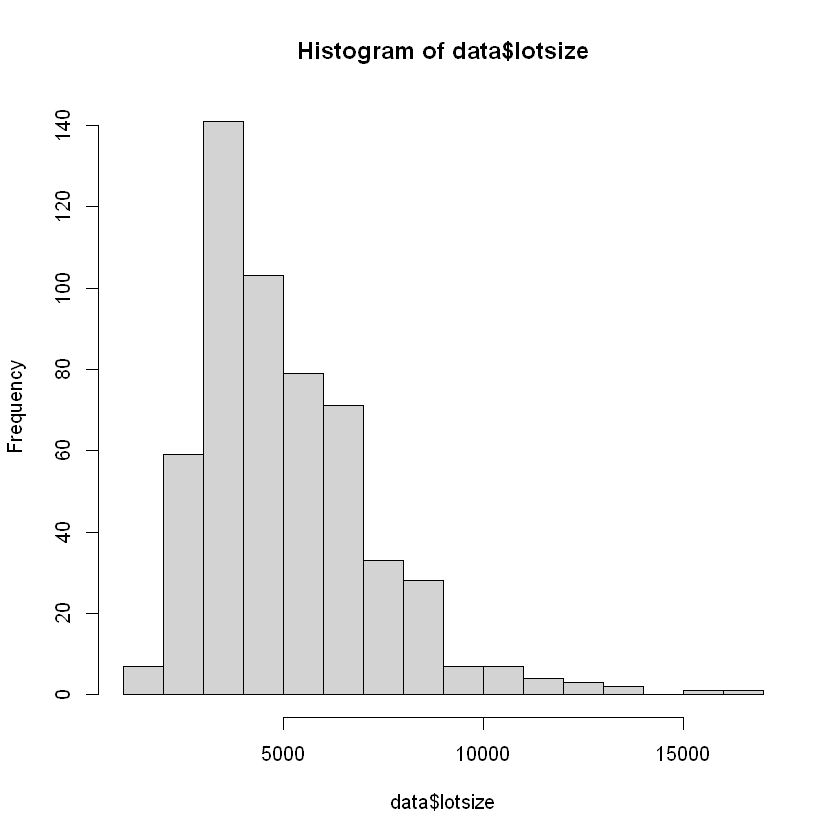

In [33]:
hist(data$lotsize)

---  
Similarly, the independent variable ("lotsize") is also skewed.

### correlations

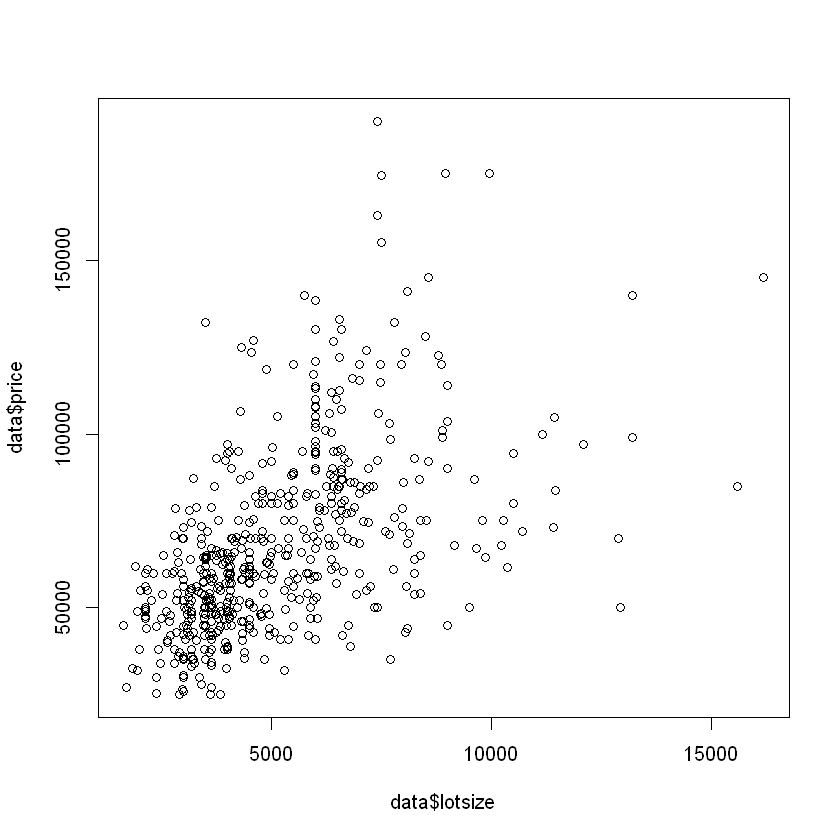

In [35]:
plot(data$lotsize, data$price)

---  
The scatter plot show somewhat a linear relationship between "lotsize" and "price", but the linear relathionship is not obvious.

## simple linear regression model

In [44]:
lm1.1 <- lm(price ~ lotsize, data = data)
summary(lm1.1)


Call:
lm(formula = price ~ lotsize, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-69551 -14626  -2858   9752 106901 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.414e+04  2.491e+03    13.7   <2e-16 ***
lotsize     6.599e+00  4.458e-01    14.8   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22570 on 544 degrees of freedom
Multiple R-squared:  0.2871,	Adjusted R-squared:  0.2858 
F-statistic: 219.1 on 1 and 544 DF,  p-value: < 2.2e-16


---  
Results show that:  
1. the "lotsize" is significantly (`p < 2e-16`) and positively (coefficient = `6.599e+00`) related to "price".
2. the whole model is significant, with `F(1, 544) = 219.1`, `p < 2.2e-16`.  
3. the adjusted R-squared is `0.2858`, indicating that 28.58% of the Y's ("price") can be explained by X ("lotsize"). 

Note:
> 1. the `2e-16` equals to `2 * 10^(-16)`. the `6.599e+00` equals to `6.599 * 10^(0)`  
> 2. in simple linear regressions (one X and one Y), the significance of the whole model equals to the significance of the X. 

## model diagnostic

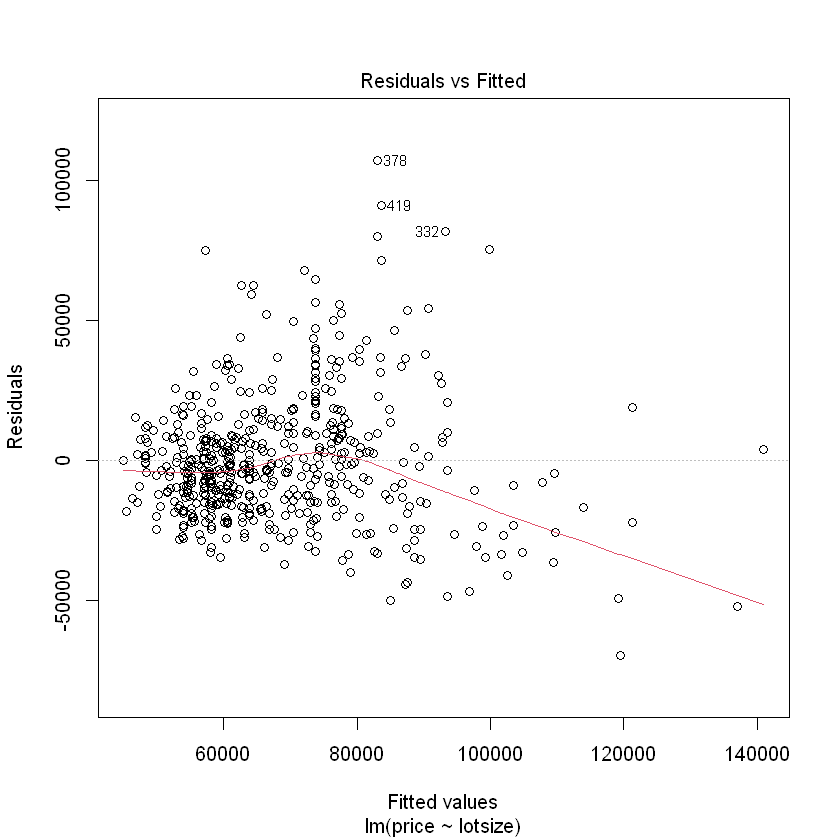

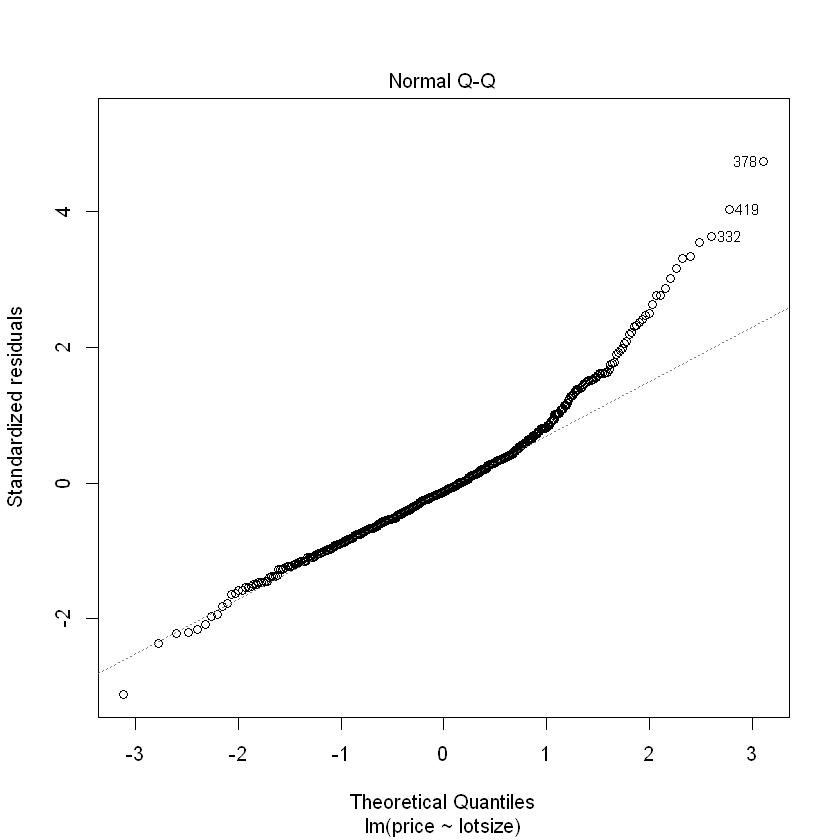

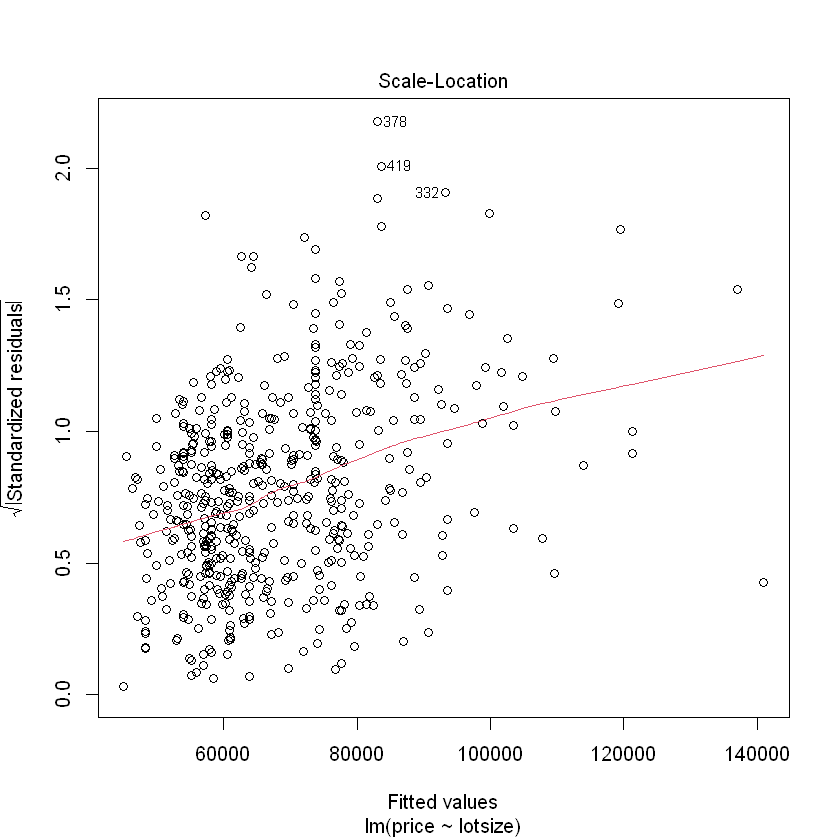

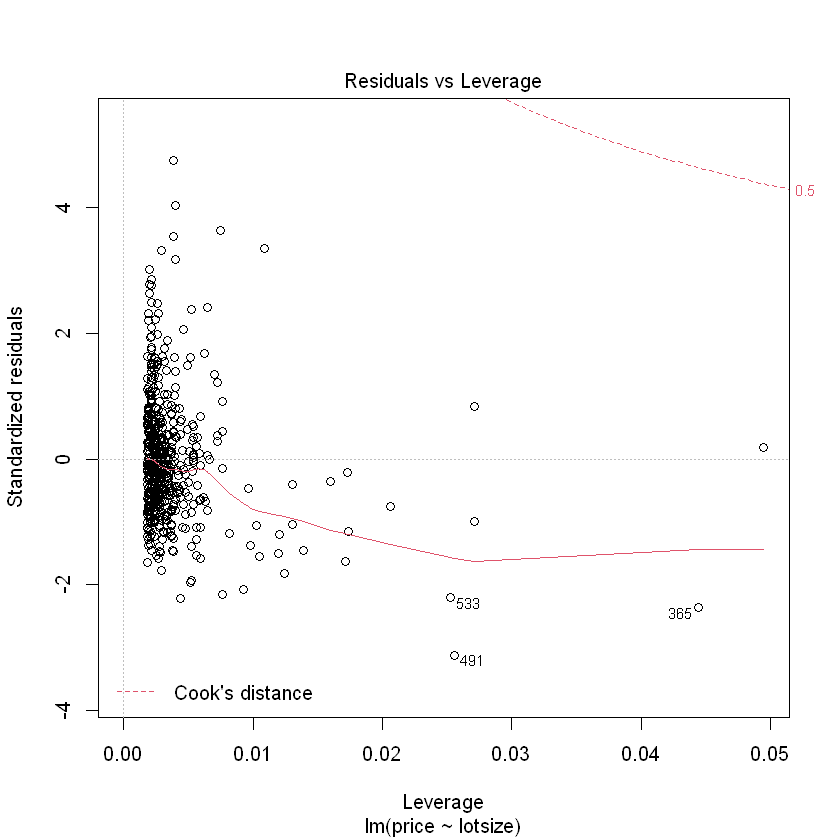

In [38]:
plot(lm1.1)

## log transformation

---  
In previous analysis, the Y and X have skewed distribution. Therefore, we use log transformation to normalize the distribution.  

Usually, we used the log transformation to normalize the skewed distributions. 

### visualization

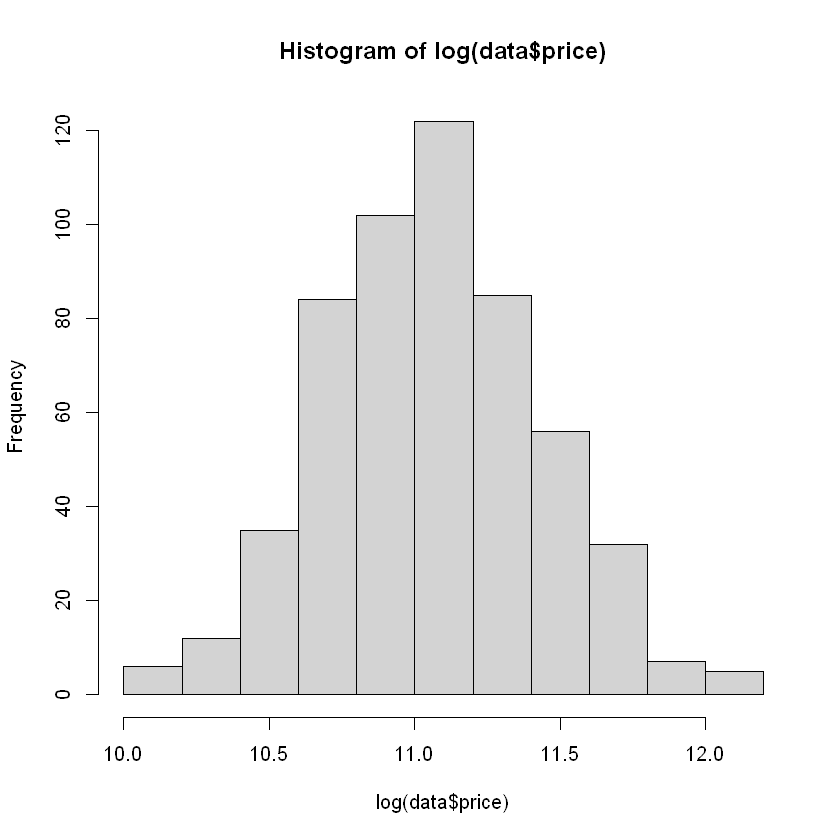

In [40]:
hist(log(data$price))

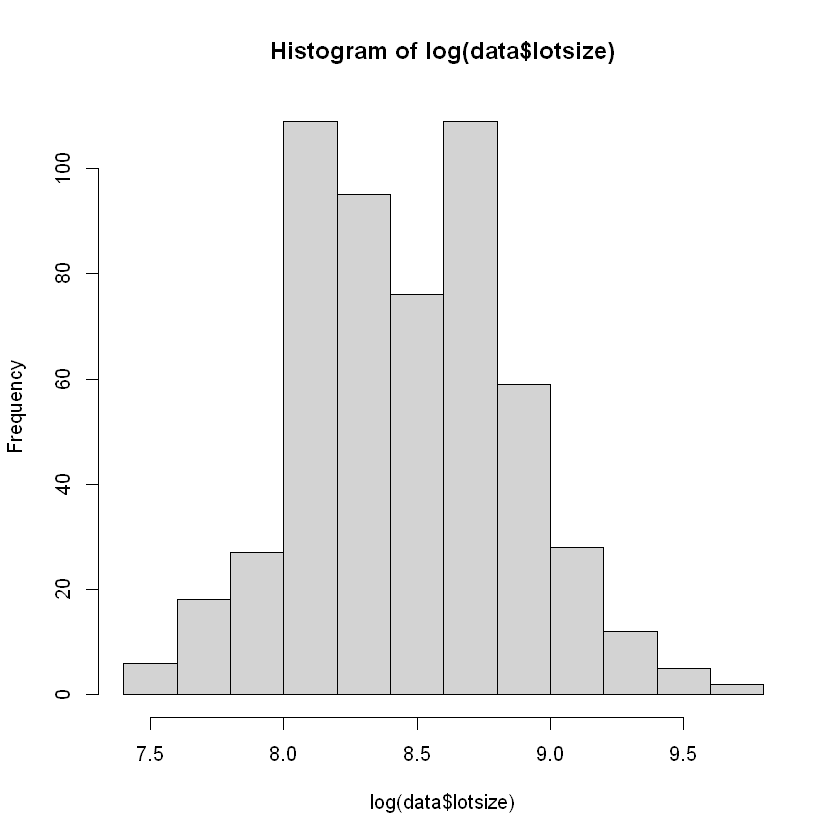

In [41]:
hist(log(data$lotsize))

---  
The histograms show that after log transformation, the Y and X are nearly normal distributed.

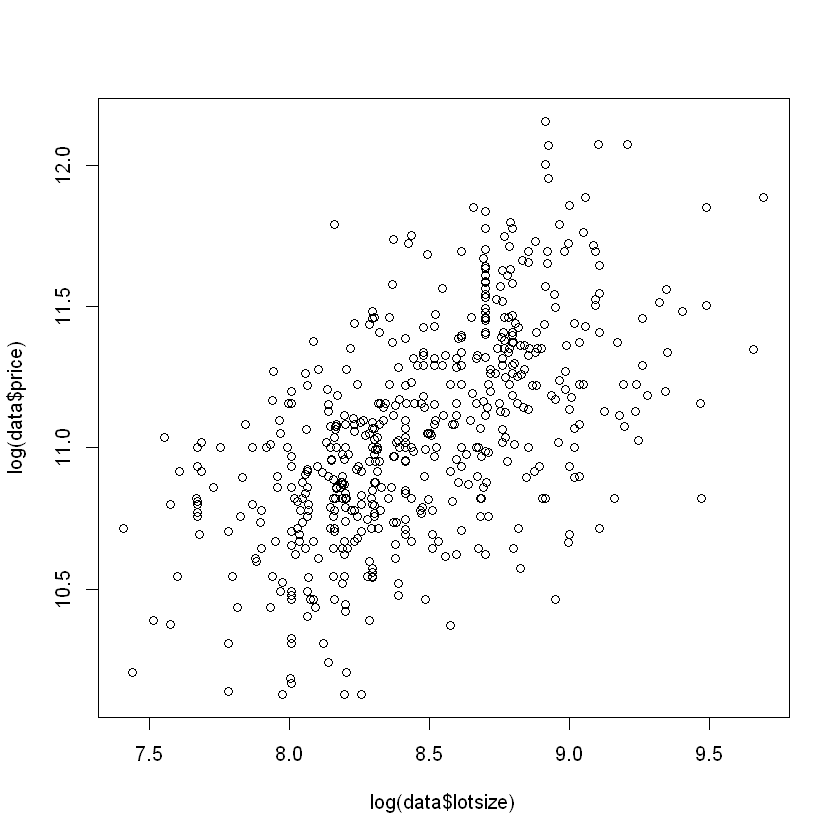

In [42]:
plot(log(data$lotsize), log(data$price))

---  
The scatter plot show a clearer linear relationship between X and Y.

### regression model

In [43]:
lm1.2 <- lm(log(price) ~ log(lotsize), data = data)
summary(lm1.2)


Call:
lm(formula = log(price) ~ log(lotsize), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85737 -0.19866  0.00396  0.19377  0.89756 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.46853    0.27674   23.37   <2e-16 ***
log(lotsize)  0.54218    0.03265   16.61   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3033 on 544 degrees of freedom
Multiple R-squared:  0.3364,	Adjusted R-squared:  0.3352 
F-statistic: 275.8 on 1 and 544 DF,  p-value: < 2.2e-16


### model diagnostic

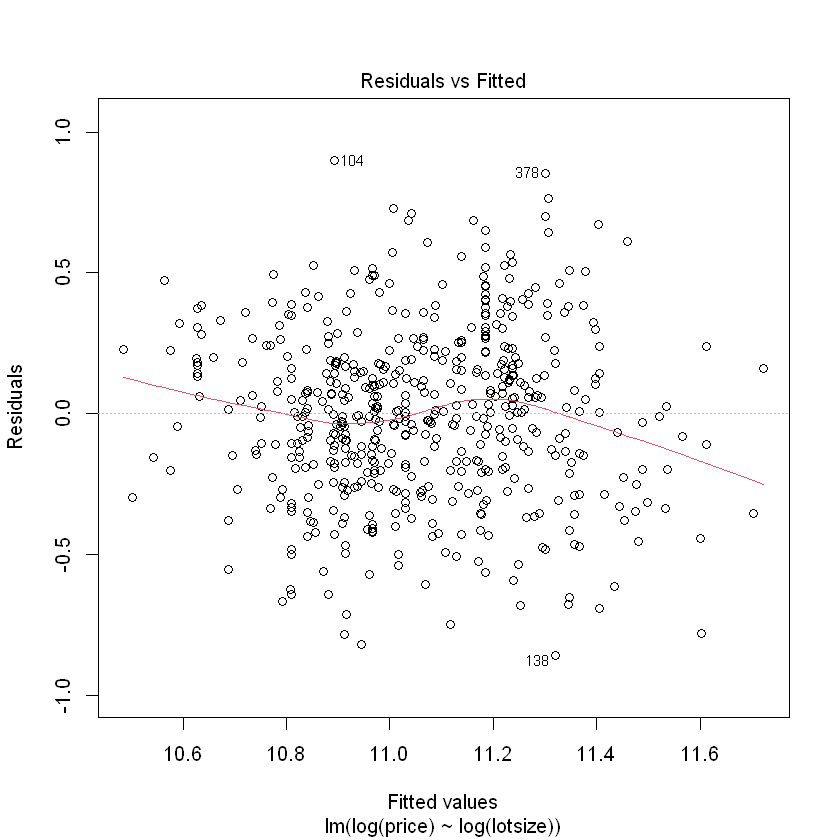

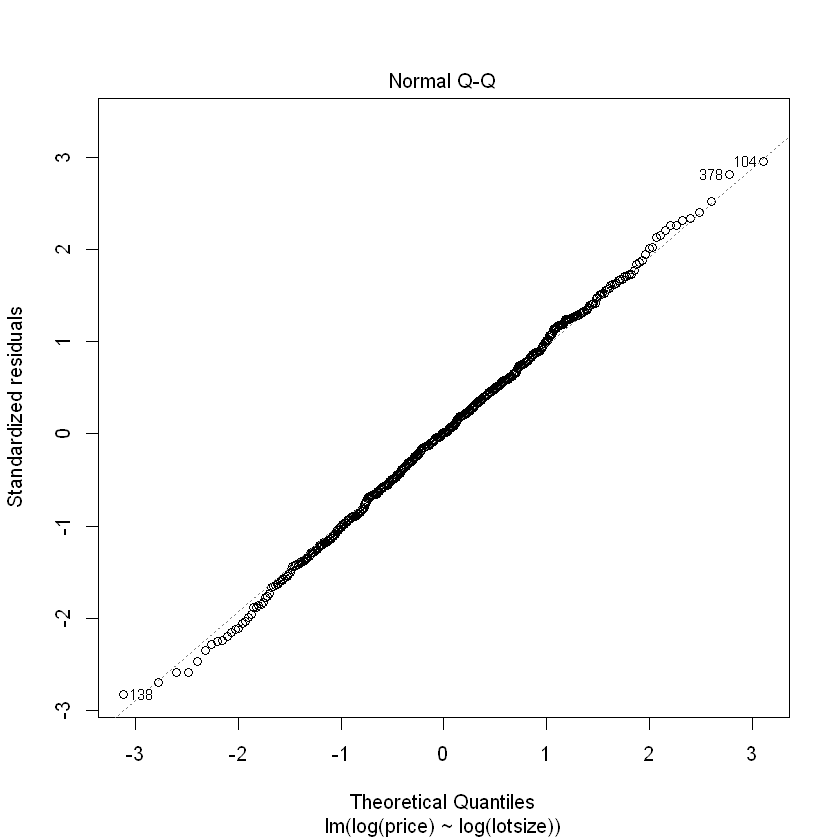

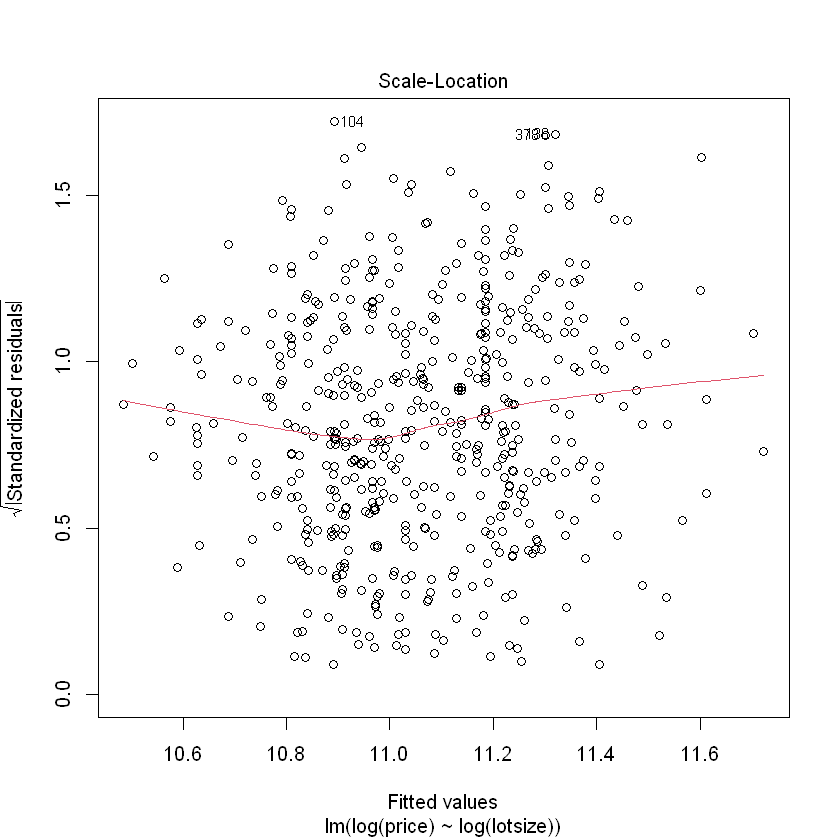

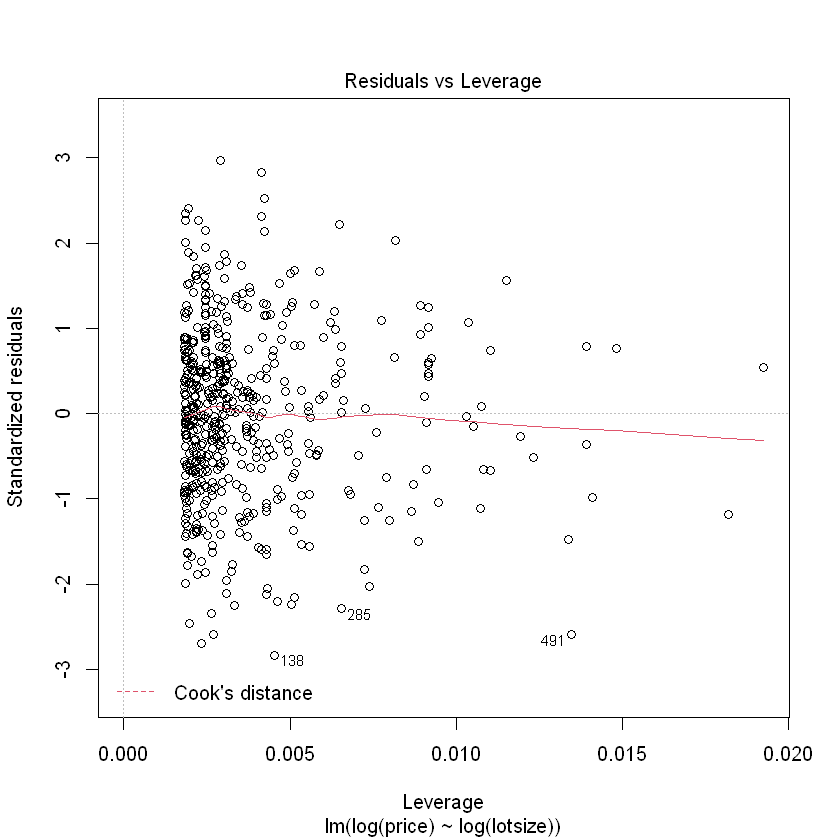

In [45]:
plot(lm1.2)

# Multiple Linear Regression

---  
The multiple linear regression involves one dependent variable (Y) and many independent variables (Xs).

In this section, we consider more independent variables that may affect house prices.

## visualization

## data visualization

### boxplot

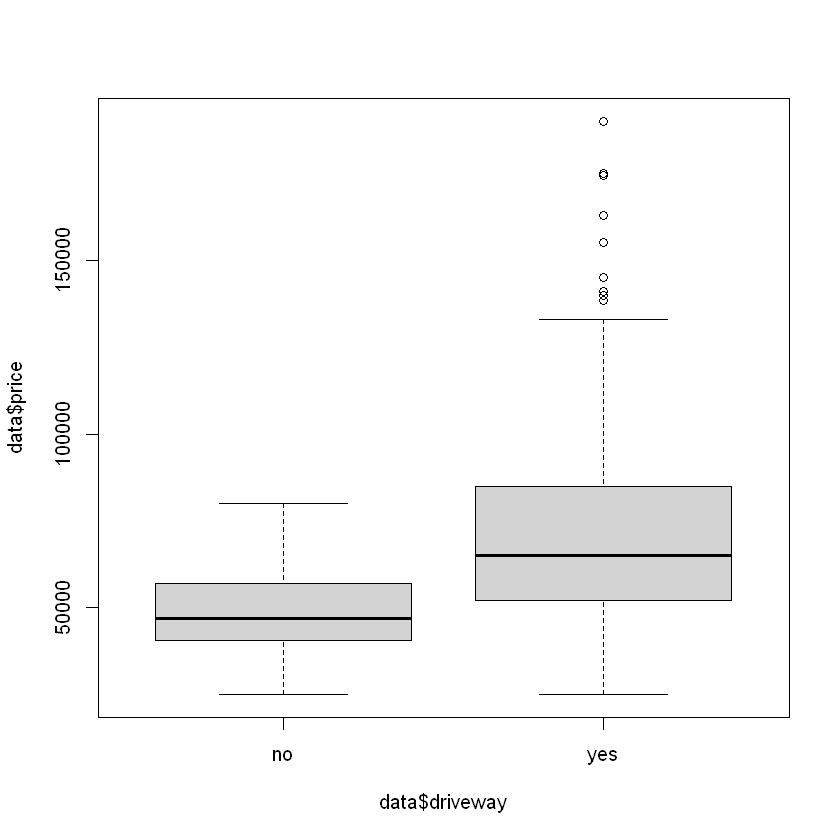

In [47]:
boxplot(data$price~data$driveway)

---     
1. The boxplot shows that houses have a driveway have higher prices than those without a driveway.  
2. We can also plot other variables.


## multiple linear regression model

In [49]:
lm2.1 <- lm(price ~ ., data = data)  # use . to represent all other columns in the dataset. This is the same as the line below.
# lm2.1 <- lm(price ~ lotsize + bedrooms + bathrooms + stories + driveway + recreation + fullbase + gasheat + aircon + garage + prefer, data = data)
summary(lm2.1)


Call:
lm(formula = price ~ ., data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-41389  -9307   -591   7353  74875 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -4038.3504  3409.4713  -1.184 0.236762    
lotsize           3.5463     0.3503  10.124  < 2e-16 ***
bedrooms       1832.0035  1047.0002   1.750 0.080733 .  
bathrooms     14335.5585  1489.9209   9.622  < 2e-16 ***
stories        6556.9457   925.2899   7.086 4.37e-12 ***
drivewayyes    6687.7789  2045.2458   3.270 0.001145 ** 
recreationyes  4511.2838  1899.9577   2.374 0.017929 *  
fullbaseyes    5452.3855  1588.0239   3.433 0.000642 ***
gasheatyes    12831.4063  3217.5971   3.988 7.60e-05 ***
airconyes     12632.8904  1555.0211   8.124 3.15e-15 ***
garage         4244.8290   840.5442   5.050 6.07e-07 ***
preferyes      9369.5132  1669.0907   5.614 3.19e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15420 on 534 degrees of

## multicollinearity test

In [51]:
# pacman::p_load(car)
vif(lm2.1)

lotsize   bedrooms  bathrooms    stories   driveway recreation   fullbase 
  1.321632   1.365633   1.282494   1.478584   1.163091   1.210501   1.316543 
   gasheat     aircon     garage     prefer 
  1.038246   1.201397   1.200839   1.147639

---  
The common threshold of VIF is 5 or 10.  
Therefore, the results show that the multicollinearity is not a problem in this analysis.

## model diagnostic

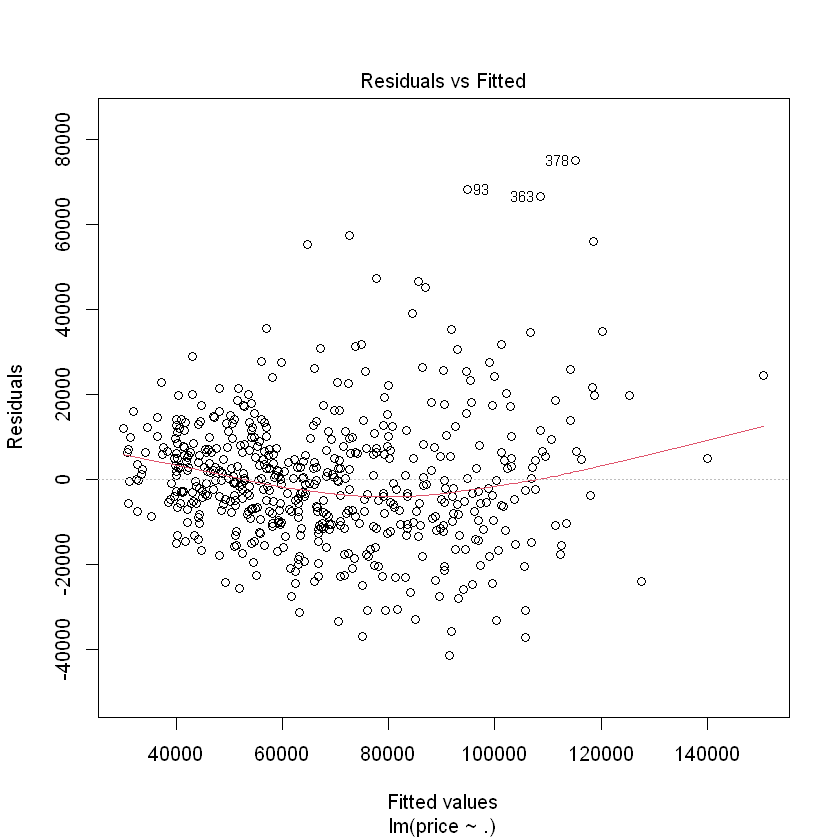

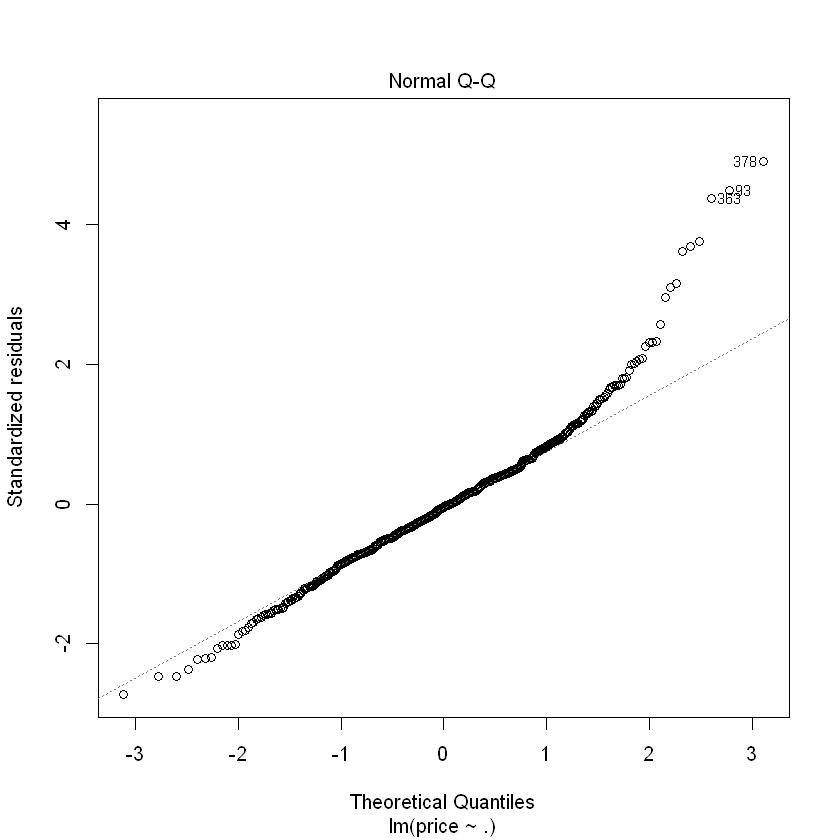

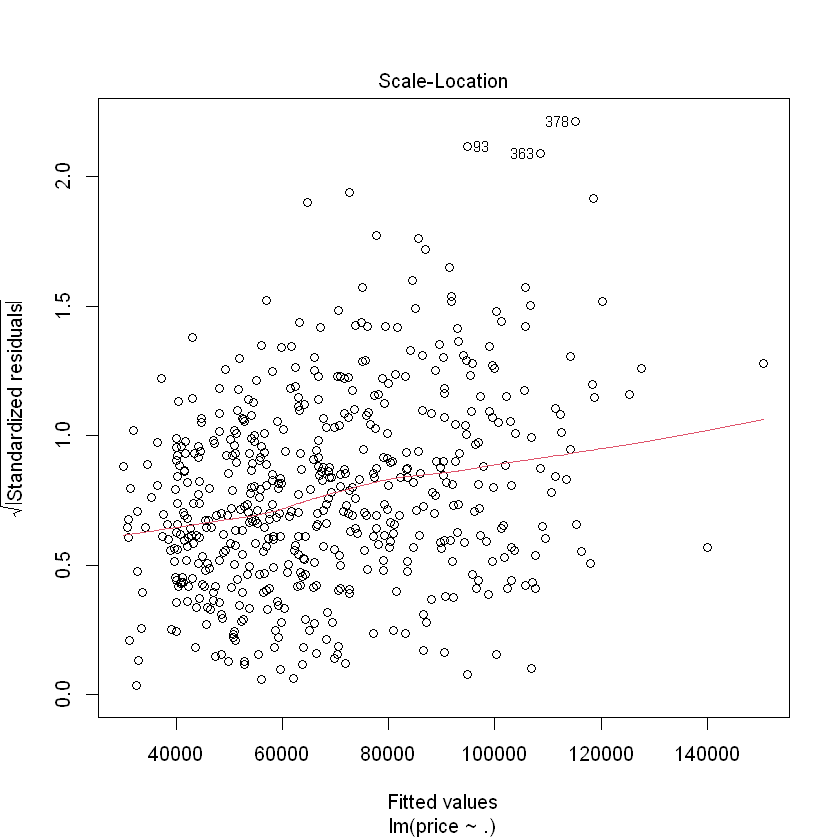

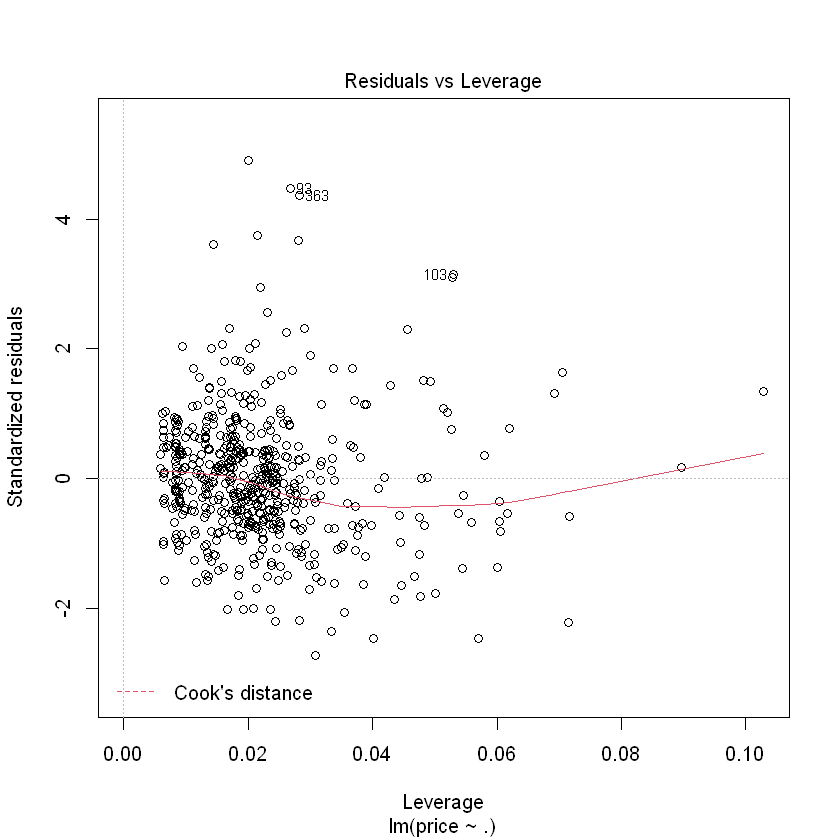

In [52]:
plot(lm2.1)

## log transformation

In [58]:
lm2.2 <- lm(log(price) ~ ., data = data)
summary(lm2.2)


Call:
lm(formula = log(price) ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67865 -0.12211  0.01666  0.12868  0.67737 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.003e+01  4.724e-02 212.210  < 2e-16 ***
lotsize       5.057e-05  4.854e-06  10.418  < 2e-16 ***
bedrooms      3.402e-02  1.451e-02   2.345  0.01939 *  
bathrooms     1.678e-01  2.065e-02   8.126 3.10e-15 ***
stories       9.227e-02  1.282e-02   7.197 2.10e-12 ***
drivewayyes   1.307e-01  2.834e-02   4.610 5.04e-06 ***
recreationyes 7.352e-02  2.633e-02   2.792  0.00542 ** 
fullbaseyes   9.940e-02  2.200e-02   4.517 7.72e-06 ***
gasheatyes    1.784e-01  4.458e-02   4.000 7.22e-05 ***
airconyes     1.780e-01  2.155e-02   8.262 1.14e-15 ***
garage        5.076e-02  1.165e-02   4.358 1.58e-05 ***
preferyes     1.271e-01  2.313e-02   5.496 6.02e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2137 on 5

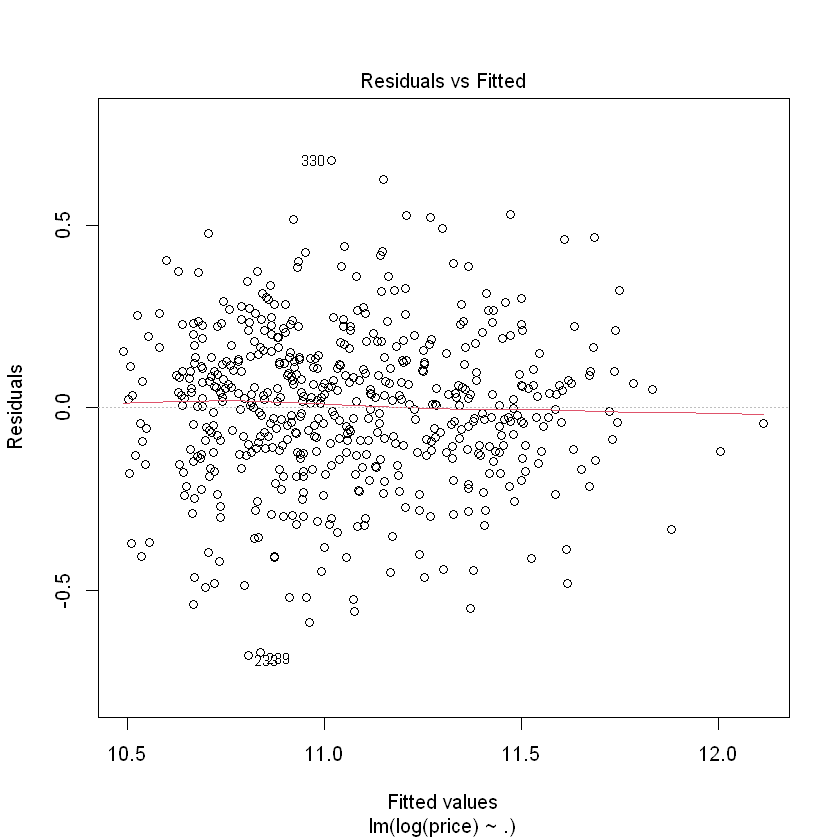

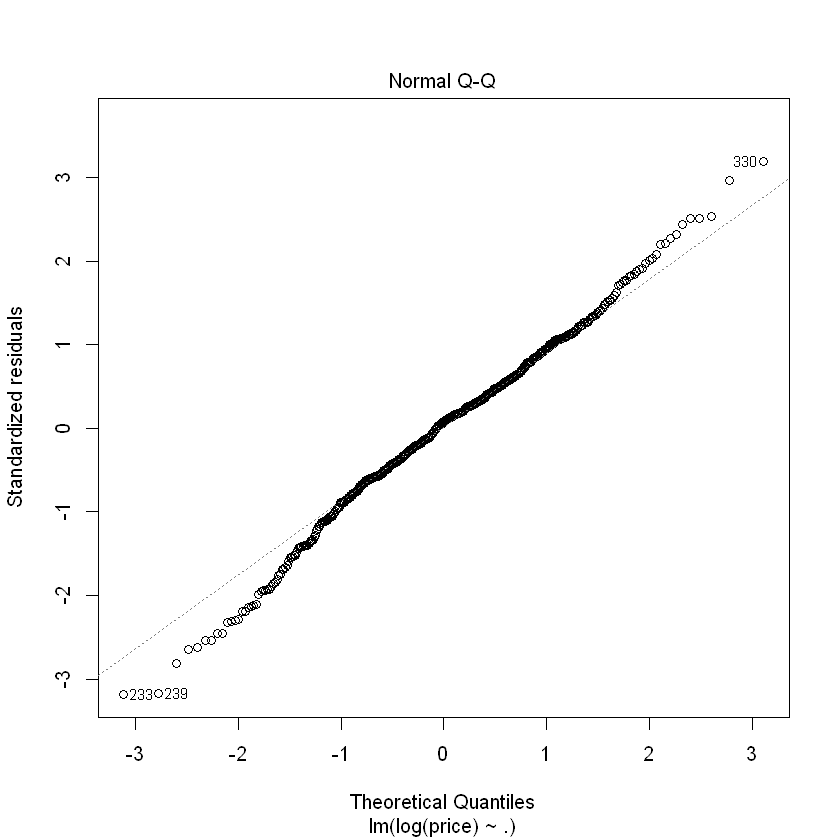

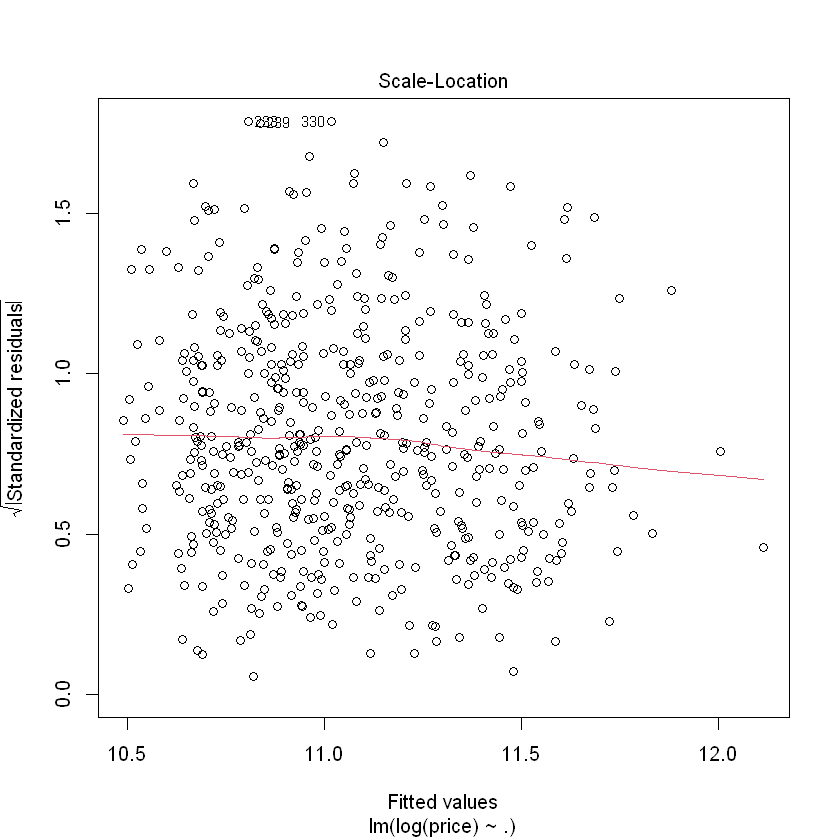

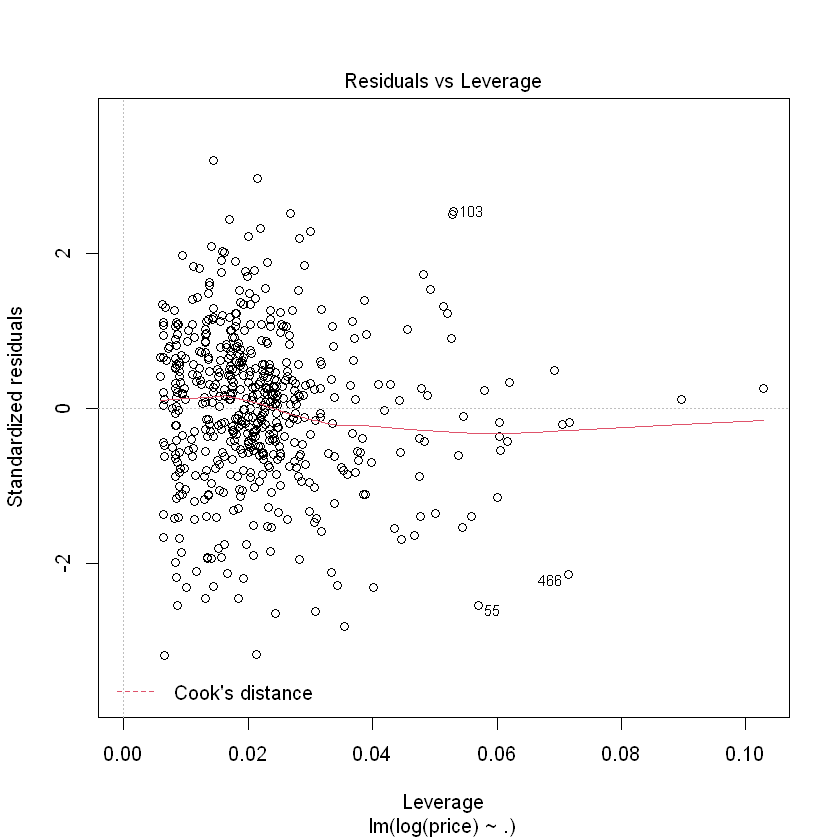

In [59]:
plot(lm2.2)